#***BANA 6350 : Quantitative Methods***

**Final Project**

University of Dallas, Irving, TX

Jane Zulu

https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention?select=dataset.csv

# **Mount google drive**

In [14]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [15]:
import os

path = "/content/gdrive/MyDrive/BANA6350/Data"

os.chdir(path)

#**Setting up formatting**#

In [16]:
import pandas as pd


In [17]:
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [14.0, 6.0]
plt.rcParams['font.size']= 18
plt.style.available   # Check what styles are available for Chart formats by visiting : https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fivethirtyeight')       # Assigning the FiveThirtyEight format, you can choose any of the names from the above link

In [18]:
# if for some reason your sns plots are not visible, run this line of code in Colab

%matplotlib inline

##**Importing python packages:**

In [19]:
!pip install sktime

In [20]:
!pip install prince

In [21]:
!pip install plotly

In [22]:
!pip install yellowbrick

In [23]:
import math
from pathlib import Path
import pandas as pd
import numpy as np

from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import from_levels_and_colors
import seaborn as sns

from statsmodels.stats import power
import prince

import plotly.express as px

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [25]:
import patsy
from sklearn.linear_model import LogisticRegression #, LogisticRegressionCV
from sklearn.metrics import (confusion_matrix, accuracy_score)

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
import patsy
from sklearn.linear_model import LogisticRegression #, LogisticRegressionCV
from sklearn.metrics import (confusion_matrix, accuracy_score)

#**Data Loading**

In [28]:
students = pd.read_csv('students.csv')
students.head()


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,17,5,171,1,1,122.0,1,19,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,2,1,15,1,9254,1,1,160.0,1,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,3,1,1,5,9070,1,1,122.0,1,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,4,1,17,2,9773,1,1,122.0,1,38,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,5,2,39,1,8014,0,1,100.0,1,37,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [29]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              4424 non-null   int64  
 1   Marital status                                  4424 non-null   int64  
 2   Application mode                                4424 non-null   int64  
 3   Application order                               4424 non-null   int64  
 4   Course                                          4424 non-null   int64  
 5   Daytime/evening attendance	                     4424 non-null   int64  
 6   Previous qualification                          4424 non-null   int64  
 7   Previous qualification (grade)                  4424 non-null   float64
 8   Nacionality                                     4424 non-null   int64  
 9   Mother's qualification                   

In [30]:
# Data Cleaning
students = students[students['Target'] != 'Enrolled']
students = students.rename(columns={'Nacionality': 'Nationality'})

In [31]:
# Define X and y variables
X = students[['Previous qualification', 'Nationality', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment',
              'Curricular units 1st sem (credited)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)',
              'Curricular units 2nd sem (approved)']]
y = students[['Target']]

In [32]:
age_min = students['Age at enrollment'].min()
age_max = students['Age at enrollment'].max()
print(f"Minimum age: {age_min}")
print(f"Maximum age: {age_max}")

Minimum age: 17
Maximum age: 70


In [33]:
# Encoding and Scaling
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=0, shuffle=True)

#**Feature Selection Using XGBoost**

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(reg_alpha=0.1,reg_lambda=1.0, use_label_encoder=False, eval_metric='logloss')

In [ ]:
# Train the model
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:20:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
feature_importances = xgb_model.feature_importances_

In [ ]:
# Sort the feature importances in descending order and get the indices
sorted_indices = feature_importances.argsort()[::-1]

In [ ]:
# Create labels for the sorted feature names
sorted_features = [X.columns[i] for i in sorted_indices]

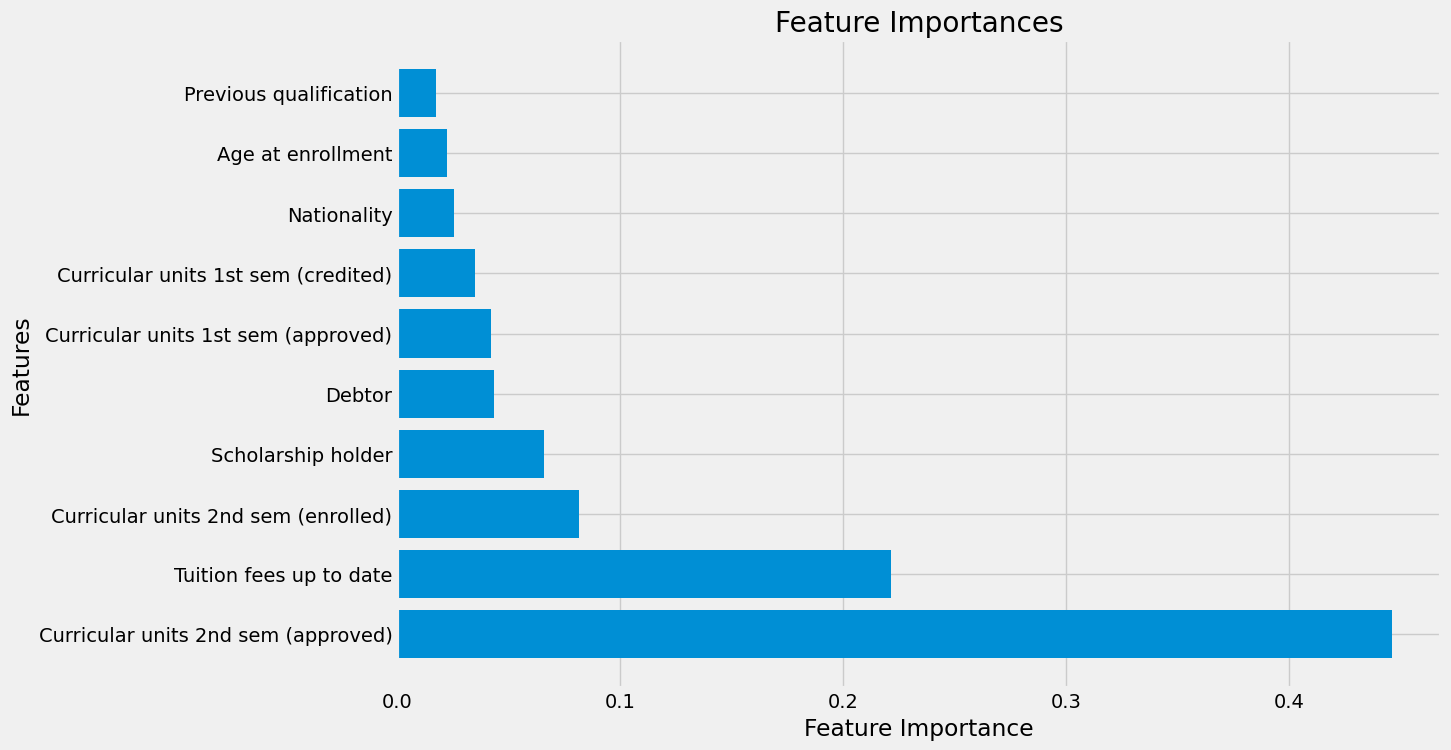

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(sorted_features, feature_importances[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

#**Logistic Regression Model**

In [ ]:
# Logistic Regression
lm = LogisticRegression(random_state=0)

# Fit model on the train set
lm.fit(X_train, y_train)

# Prediction on the test set
y_pred_lm = lm.predict(X_test)

# Accuracy of the model
score_test_lm= lm.score(X_test, y_test)
score_train_lm= lm.score(X_train, y_train)

print("Accuracy Train_lm:", score_train_lm)    # 91% accurate
print("Accuracy Test_lm:", score_test_lm)      # 90% accurate
print("Predictions_lm:", y_pred_lm)


Accuracy Train_lm: 0.9146005509641874
Accuracy Test_lm: 0.9054178145087236
Predictions_lm: [1 1 0 ... 1 1 0]


In [ ]:
precision_lm = precision_score(y_test, y_pred_lm, average='macro')
recall_lm = recall_score(y_test, y_pred_lm, average='macro')
accuracy_lm = accuracy_score(y_test, y_pred_lm)

print("Precision:", precision_lm)
print("Recall:", recall_lm)
print("Accuracy:", accuracy_lm)

Precision: 0.908782125033893
Recall: 0.8930745814307458
Accuracy: 0.9054178145087236


# **K-Nearest Neighbors**

Minimum error:- 0.10009182736455463 at K = 7


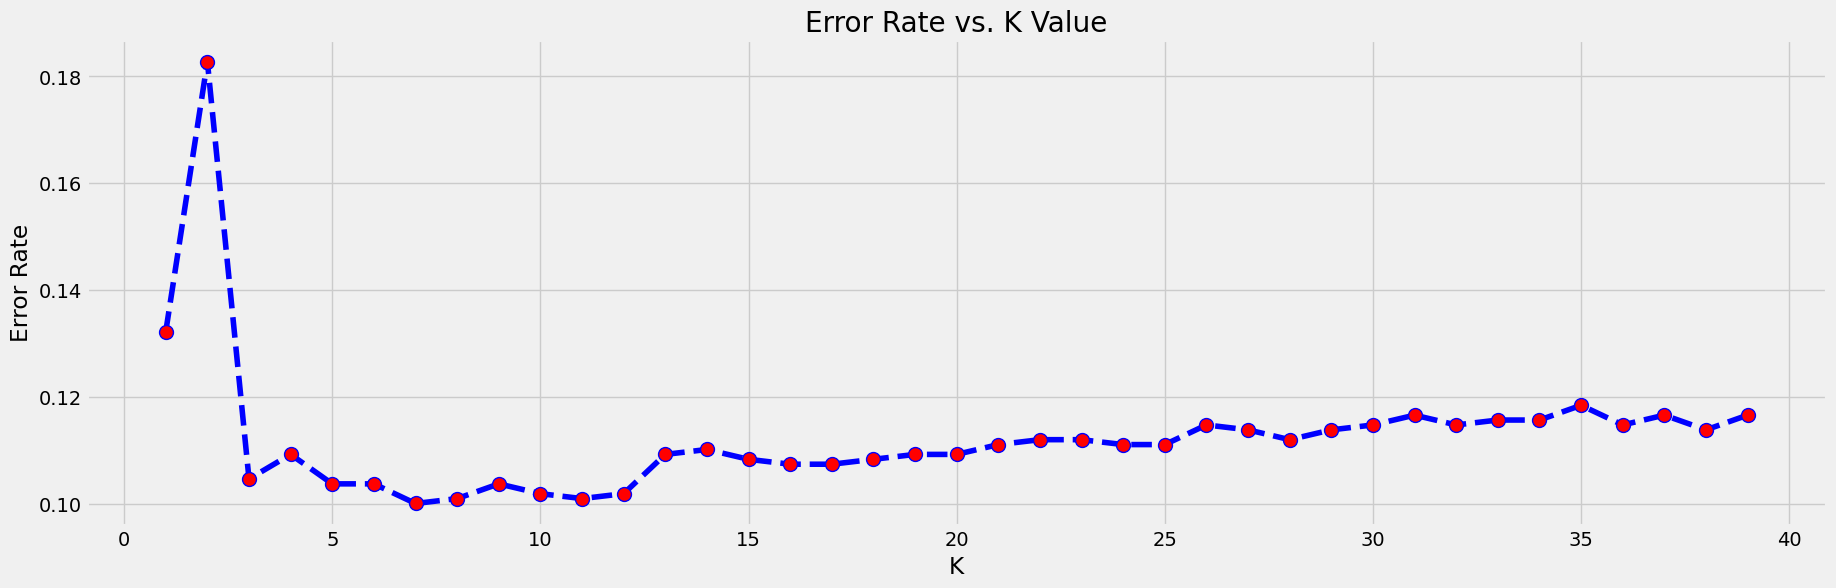

In [ ]:
# OPTIMAL k value
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(20,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

# smallest error is at K= 7

Maximum accuracy:- 0.8999081726354453 at K = 7


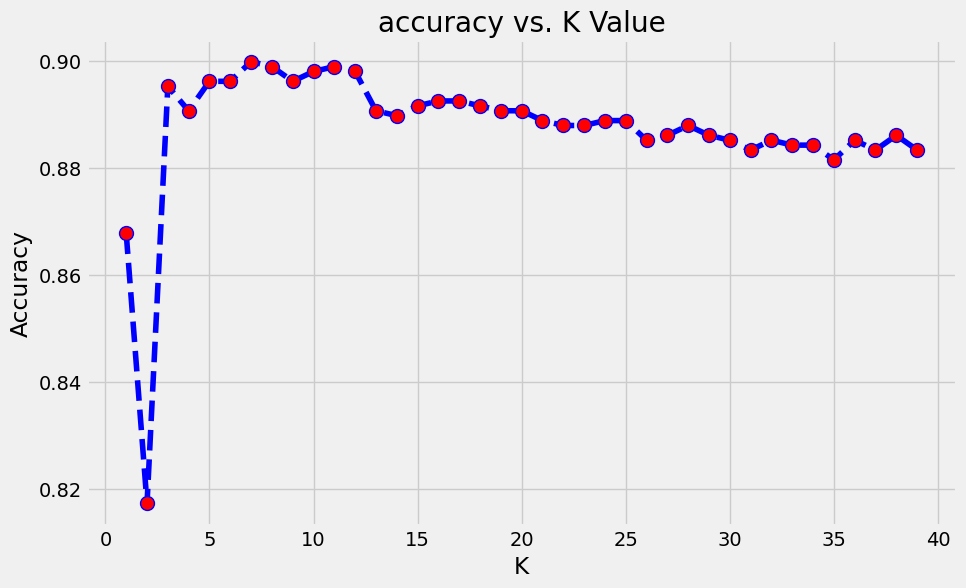

In [ ]:
acc = []


from sklearn import metrics

for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))


plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

In [ ]:
# Train the model with k=7

knn = KNeighborsClassifier(n_neighbors=7)

# Train the classifier on the training set
knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_knn = knn.predict(X_test)

# Print the accuracy of the classifier
print('Accuracy_knn:', knn.score(X_test, y_test))

# Calculate the accuracy of the model
score_test_knn = knn.score(X_test, y_test)
score_train_knn = knn.score(X_train, y_train)

print("Accuracy Train_knn:", score_train_knn)    # here it is going to be 91% accurate, proving that the RF model over fitted the train dataset
print("Accuracy Test_knn:", score_test_knn)      # here it will be 89% accurate
print("Predictions_knn:", y_pred_knn)

Accuracy_knn: 0.8999081726354453
Accuracy Train_knn: 0.9146005509641874
Accuracy Test_knn: 0.8999081726354453
Predictions_knn: [1 1 0 ... 1 1 1]


In [ ]:
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("Accuracy:", accuracy_knn)

Precision: 0.9048865006397977
Recall: 0.8857337645865043
Accuracy: 0.8999081726354453


#**ROC Curve and AUC**

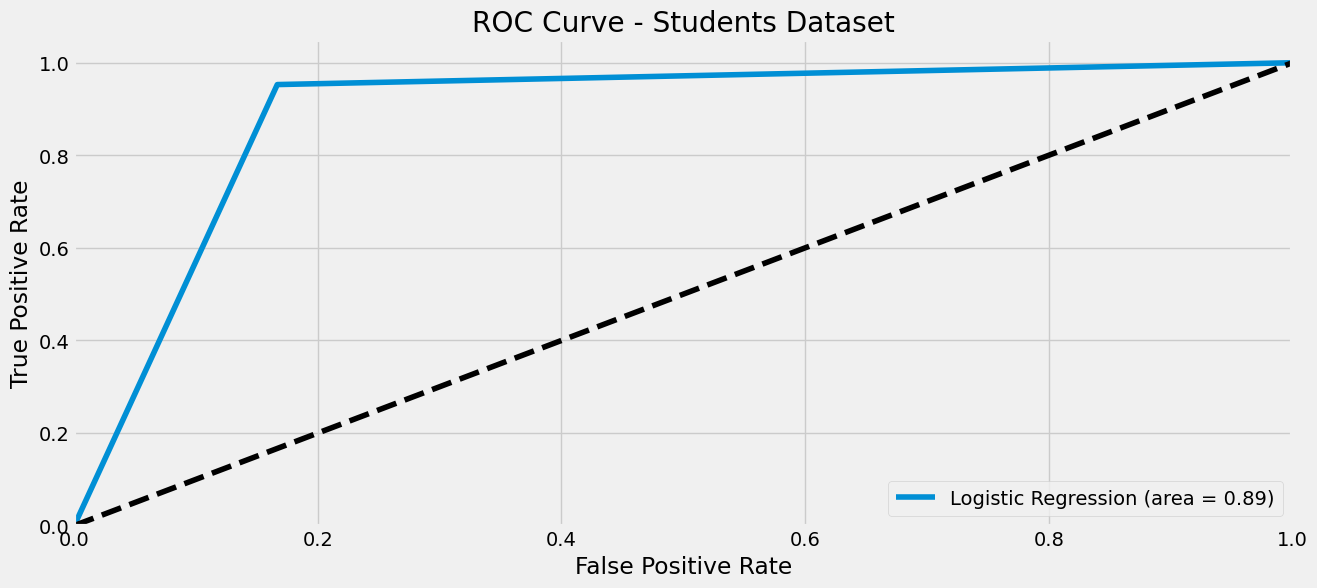

In [ ]:
####################################
# ROC Curve Construction
####################################

# compute TPR = True Positive Rate and FPR=False Positive Rate for various thresholds

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lm)

# compute AUC
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr,label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Students Dataset')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

auc_lm = roc_auc_score(y_test, y_pred_lm)
auc_lm

0.8930745814307458

# **XGBoost**

In [ ]:
# Evaluate the model
print('Accuracy_xgb:', xgb_model.score(X_test, y_test))

# Predict the labels of the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the accuracy of the model
score_test_xgb = xgb_model.score(X_test, y_test)
score_train_xgb = xgb_model.score(X_train, y_train)

print("Accuracy Train_xgb:", score_train_xgb)    # here it is going to be 95% accurate
print("Accuracy Test_xgb:", score_test_xgb)      # here it will be 89% accurate
print("Predictions_xgb:", y_pred_xgb)

Accuracy_xgb: 0.8999081726354453
Accuracy Train_xgb: 0.9555293191656828
Accuracy Test_xgb: 0.8999081726354453
Predictions_xgb: [1 1 0 ... 1 1 0]


In [ ]:
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("Accuracy:", accuracy_xgb)

Precision: 0.9004994780490634
Recall: 0.8893011161846778
Accuracy: 0.8999081726354453


#**Visualizations**

In [36]:
# Calculate and print counts and percentages
counts = students['Target'].value_counts()
percentages = counts / len(students) * 100
print("Counts:\n", counts)
print("\nPercentages:\n", percentages)

Counts:
 Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

Percentages:
 Target
Graduate    60.853994
Dropout     39.146006
Name: count, dtype: float64


<ipython-input-37-fdaec0bb212d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=students, palette='Set1')


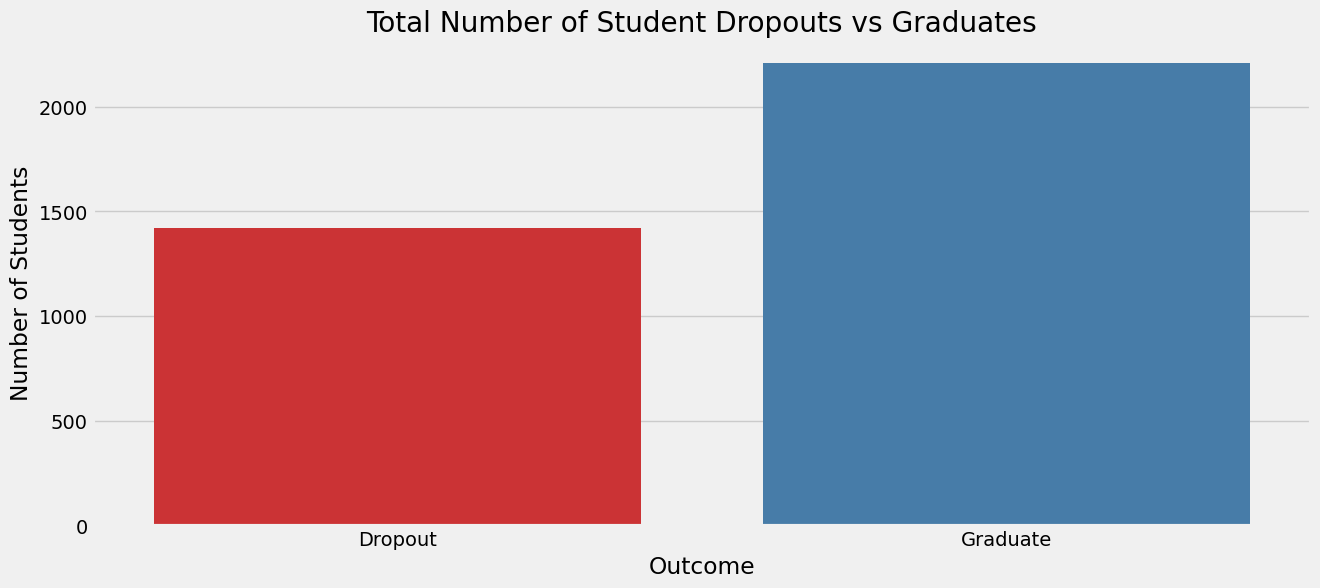

Target
Graduate    60.853994
Dropout     39.146006
Name: count, dtype: float64


In [37]:
# No. of Students who Graduate vs Dropout
sns.countplot(x='Target', data=students, palette='Set1')
plt.title('Total Number of Student Dropouts vs Graduates')
plt.xlabel('Outcome')
plt.ylabel('Number of Students')
plt.show()

#find percentages
counts = students['Target'].value_counts()
percentages = counts / len(students) * 100

print(percentages)


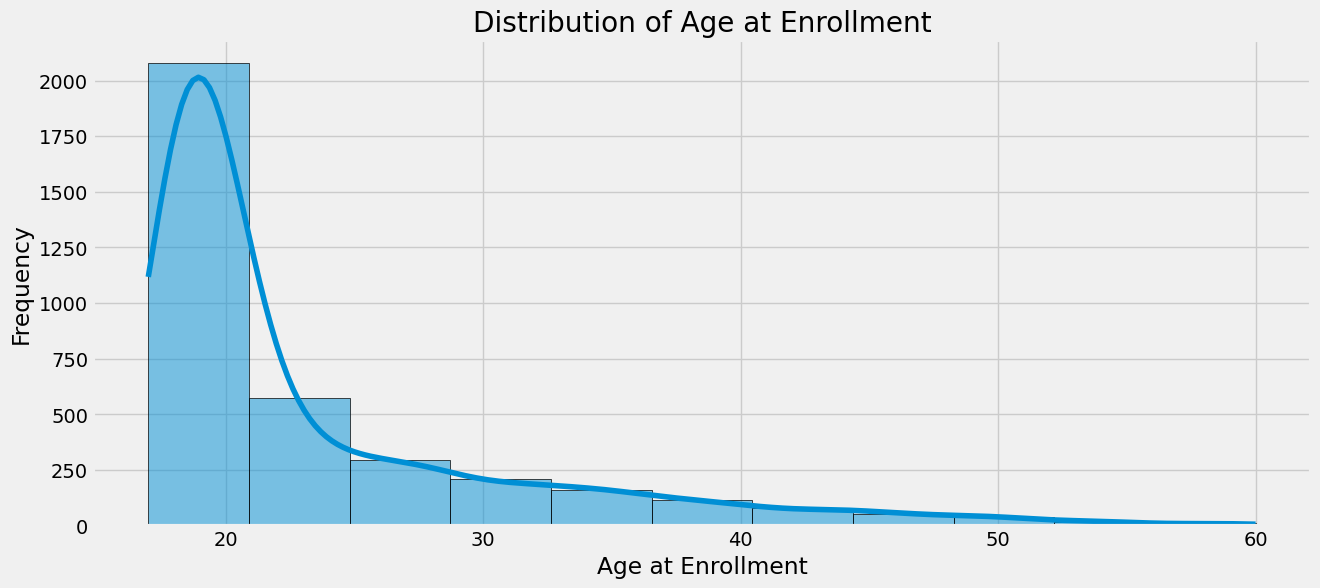

In [38]:
# Distribution of Age at Enrollment
students_hist = students[(students['Age at enrollment'] >= 10) & (students['Age at enrollment'] <= 60)]
sns.histplot(students_hist['Age at enrollment'], bins=11, kde=True, edgecolor='black')
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Define columns to exclude
exclude_columns = ['id', 'Target']  # Replace with actual column names to exclude


# Define the columns for each category
demographic_columns = ['Marital status', 'Nacionality', 'Gender', 'Age at enrollment', 'Nationality', 'Educational special needs', 'Displaced']
socio_economic_columns = ['Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International', 'Inflation rate', 'GDP', 'Unemployment rate']
academic_performance_columns = ['Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Admission grade', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Previous qualification (grade)', 'Daytime/evening attendance\t']

# Combine all categorized columns
categorized_columns = set(demographic_columns + socio_economic_columns + academic_performance_columns)

# Identify any columns not included in the categories and excluding specific columns
all_columns = set(students.columns) - set(exclude_columns)
uncategorized_columns = all_columns - categorized_columns

# Calculate the number of columns in each category
total_columns = len(all_columns)
demographic_count = len([col for col in demographic_columns if col in all_columns])
socio_economic_count = len([col for col in socio_economic_columns if col in all_columns])
academic_performance_count = len([col for col in academic_performance_columns if col in all_columns])

# Calculate the percentages
demographic_percentage = (demographic_count / total_columns) * 100
socio_economic_percentage = (socio_economic_count / total_columns) * 100
academic_performance_percentage = (academic_performance_count / total_columns) * 100

# Print the results
print(f"Demographic Data: {demographic_percentage:.2f}%")
print(f"Socio-Economic Data: {socio_economic_percentage:.2f}%")
print(f"Academic Performance Data: {academic_performance_percentage:.2f}%")


Demographic Data: 16.67%
Socio-Economic Data: 30.56%
Academic Performance Data: 52.78%


##**LM Confusion Matrix**

In [40]:
# Calculate the confusion matrix
cm_lm = confusion_matrix(y_test, y_pred_lm)

# Calculate the precision, recall, and accuracy

precision_lm = precision_score(y_test, y_pred_lm, average='macro')
recall_lm = recall_score(y_test, y_pred_lm, average='macro')
accuracy_lm = accuracy_score(y_test, y_pred_lm)

# Print the confusion matrix, precision, recall, and accuracy
print('Confusion Matrix_lm:\n', cm_lm)
print('Precision_lm:', precision_lm)
print('Recall_lm:', recall_lm)
print('Accuracy_lm:', accuracy_lm)

NameError: name 'y_pred_lm' is not defined

In [ ]:
sns.heatmap(cm_lm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Model")
plt.show()

##**KNN Confusion Matrix**

In [ ]:
# Calculate the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Calculate the precision, recall, and accuracy

precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the confusion matrix, precision, recall, and accuracy
print('Confusion Matrix_knn:\n', cm_knn)
print('Precision_lm:', precision_knn)
print('Recall_knn:', recall_knn)
print('Accuracy_knn:', accuracy_knn)

In [ ]:
sns.heatmap(cm_knn, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("K-Nearest Neighbor Model")
plt.show()

##**XGB Confusion Matrix**

In [ ]:
# Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Calculate the precision, recall, and accuracy

precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print the confusion matrix, precision, recall, and accuracy
print('Confusion Matrix_lm:\n', cm_xgb)
print('Precision_lm:', precision_xgb)
print('Recall_lm:', recall_xgb)
print('Accuracy_lm:', accuracy_xgb)

In [ ]:
sns.heatmap(cm_xgb, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Model")
plt.show()

#**Summary Report of Various the Models' Performance**

In [ ]:
print("*******************************************")
print("********* Accuracy during Training ********")
print("*******************************************")
print("                                           ")
print("Accuracy Train_lm.   :", score_train_lm)
print("Accuracy Train_knn.  :", score_train_knn)
print("Accuracy Train_xgb.  :", score_train_xgb)
print("                                           ")
print("*******************************************")
print("********* Accuracy during Testing ********")
print("*******************************************")
print("                                           ")
print("Accuracy Test_lm    :", score_test_lm)
print("Accuracy Test_knn.  :", score_test_knn)
print("Accuracy Test_xgb.  :", score_test_xgb)


*******************************************
********* Accuracy during Training ********
*******************************************
                                           
Accuracy Train_lm.   : 0.9146005509641874
Accuracy Train_knn.  : 0.9146005509641874
Accuracy Train_xgb.  : 0.9555293191656828
                                           
*******************************************
********* Accuracy during Testing ********
*******************************************
                                           
Accuracy Test_lm    : 0.9054178145087236
Accuracy Test_knn.  : 0.8999081726354453
Accuracy Test_xgb.  : 0.8999081726354453
